In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver ## 브라우저 제어
from selenium.webdriver.chrome.service import Service as ChromeService ## 크롬 브라우저 제어
from selenium.webdriver.common.keys import Keys ## 키보드 제어
from selenium.webdriver.support import expected_conditions as EC ## 웹페이지 조건 기다림
from selenium.webdriver.support.ui import WebDriverWait ## 웹페이지 대기
from selenium.webdriver.common.by import By ## 웹페이지 요소

from webdriver_manager.chrome import ChromeDriverManager


import warnings
warnings.filterwarnings(action="ignore")
import re
import pandas as pd
import datetime
import time
import os
from tqdm import tqdm

today = datetime.date.today().strftime("%Y-%m-%d")

options = webdriver.ChromeOptions()
options.add_argument("--disable-web-security") ## 웹 보안 해제
options.add_argument("--disable-site-isolation-trials") ## 사이트 격리 해제
options.add_argument("--window-size=1440,1200") ## 창 크기

# options.add_argument('headless') ## 헤드리스

Keys = Keys()
options.add_argument(
    "user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2564.116 Safari/537.37"
) ## 가짜 User-Agent 실행 (크롬 49 버전으로 위장)


driver = webdriver.Chrome(
    service=ChromeService(ChromeDriverManager().install()), options=options
) ## 크롬드라이버를 설치하고 옵션을 적용하여 실행

driver.implicitly_wait(10) ## 웹페이지가 로드되는 시간을 암묵적 대기, 5초 기다림

In [2]:
BASE_URL = '''https://www.wanted.co.kr/search?query=%EB%8D%B0%EC%9D%B4%ED%84%B0+%EB%B6%84%EC%84%9D&tab=position'''

driver.get(BASE_URL)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [3]:
time.sleep(1)

## 무한 스크롤 아래로 내리기
SCROLL_PAUSE_TIME = 2
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [8]:
## 페이지 소스 가져오기
htmls = driver.page_source
soups = BeautifulSoup(htmls, 'html.parser')
items= soups.find_all('div', class_='JobCard_container__FqChn JobCard_container--variant-card__znjV9')

In [9]:
## index를 유지하면서 중복되는 요소 제거
items = list({item.text: item for item in items}.values())

In [10]:
target_url_list = []
for item in items:
    url = 'https://www.wanted.co.kr'+item.find('a')['href']
    target_url_list.append(url)

In [11]:
target_url_list

['https://www.wanted.co.kr/wd/224337',
 'https://www.wanted.co.kr/wd/219966',
 'https://www.wanted.co.kr/wd/215835',
 'https://www.wanted.co.kr/wd/218916',
 'https://www.wanted.co.kr/wd/224841',
 'https://www.wanted.co.kr/wd/223481',
 'https://www.wanted.co.kr/wd/222883',
 'https://www.wanted.co.kr/wd/223175',
 'https://www.wanted.co.kr/wd/161548',
 'https://www.wanted.co.kr/wd/191674',
 'https://www.wanted.co.kr/wd/216979',
 'https://www.wanted.co.kr/wd/201396',
 'https://www.wanted.co.kr/wd/215210',
 'https://www.wanted.co.kr/wd/193901',
 'https://www.wanted.co.kr/wd/142793',
 'https://www.wanted.co.kr/wd/191938',
 'https://www.wanted.co.kr/wd/219963',
 'https://www.wanted.co.kr/wd/85810',
 'https://www.wanted.co.kr/wd/224170',
 'https://www.wanted.co.kr/wd/180914',
 'https://www.wanted.co.kr/wd/208247',
 'https://www.wanted.co.kr/wd/215111',
 'https://www.wanted.co.kr/wd/221269',
 'https://www.wanted.co.kr/wd/210507',
 'https://www.wanted.co.kr/wd/212760',
 'https://www.wanted.co.kr

어제 한 거랑 똑같이 XPath 복사
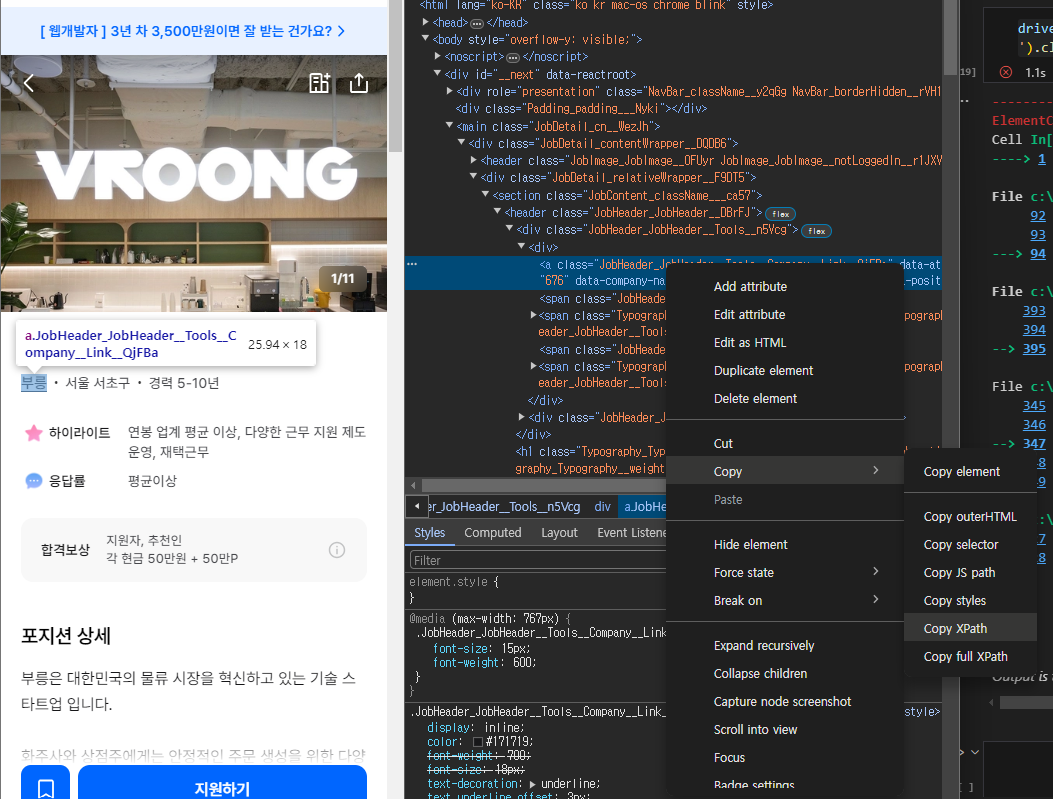

In [16]:
company_name = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div[1]/div/section/header/div/div[1]/a').text

In [15]:
title = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div[1]/div/section/header/h1').text

In [17]:
print(company_name)
print(title)

부릉
Data Scientist


In [22]:
driver.find_element(By.XPATH, '//*[@id="__next"]/main/div[1]/div/section/section/article[1]/div/button/span[2]').click()

In [23]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## 상세 더보기 버튼 누르기
try:
    driver.find_element(By.XPATH, '//*[@id="__next"]/main/div[1]/div/section/section/article[1]/div/button/span[2]').click()
except:
    pass

position_detail = soup.find('section', {'class': 'JobContent_descriptionWrapper__SM4UD'})\
                    .find('article', {'class': 'JobDescription_JobDescription__VWfcb'})

In [24]:
position_detail.text

'포지션 상세부릉은 대한민국의 물류 시장을 혁신하고 있는 기술 스타트업 입니다. 화주사와 상점주에게는 안정적인 주문 생성을 위한 다양한 연결 수단(API 연동, 부릉 POS, 모바일 POS 앱)을 제공해 드리고 있고, 사장님 사이트를 통해 빅데이터 기반의 배달 분석 정보를 전달드리고 있습니다.라이더에게는 최적의 배송 플랫폼인 부릉 기사 앱, 통합관제센터, 실시간 정산 시스템을 제공하여, 배송 품질을 높이면서도 안정적으로 수익을 벌어갈 수 있게 해 드립니다. 전국에 구축된 300여개의 부릉 스테이션을 통해 기사들에게 쉼터이자 물류거점을 제공하고 있습니다.주요업무• 지표 개발 및 데이터 파이프라인 구축 개발• 추천 시스템 모델 디버깅 및 성능 개선• 추천 시스템 API 개발• ML 인프라 운영* Tech Stack : (https://stackshare.io/mesh-korea-co-ltd/data-scientist)자격요건- ML 시스템 개발 경험이 있으신 분- 웹 서비스와 서비스 인프라에 대한 이해가 있으신 분- 빅데이터에 대한 알고리즘 작성 및 코딩 능력을 보유하신 분- Python, Java 중 한 가지 이상 언어에 능숙하신 분우대사항• AWS 기반 데이터 파이프라인 개발/운영 경험이 있으신 분• 추천 시스템, 예측 시스템 경험이 있으신 분• Date Lake 및 Warehouse 운영 및 개발 경험이 있으신 분• 통계 및 AI 에 대한 이해 및 높은 관심이 있으신 분• MicroService 기반 API 개발 경험이 있으신 분혜택 및 복지• 재택근무제 및 자율 출퇴근제 운영• 생일자 지원 : 생일휴가 1 일 및 상품권 증정• 최고사양 노트북 신품 제공 (M3 PRO 32GB / 1TB)• 복지 포인트 지원 : 월 10 만원 포인트로 복리후생 목적 용도 사용가능, 체력 단련, 도서 구매 등 (연 120만원)• 경조휴가 및 경조금 지원 : 경조사 발생 시, 사유에 따라 휴가 및 경조금 지원• 종합검진 지원 : 본인 100% 및 가족 1 인 50% 지원• 리프

In [30]:
## 상세정보 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/main/div[1]/div/section/section/article[1]/div/button/span[2]').click()

## 페이지 소스 업데이트
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
position_detail = soup.find('section', {'class': 'JobContent_descriptionWrapper__SM4UD'})\
                    .find('article', {'class': 'JobDescription_JobDescription__VWfcb'})

In [31]:
team_info = position_detail.find('p').text

In [35]:
team_info = position_detail.find('p').text
main_job_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[0].find('h3').text
main_job_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[0].find('p').text
requirement_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[1].find('h3').text
requirement_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[1].find('p').text

preferred_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[2].find('h3').text
preferred_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[2].find('p').text
wellbeing_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[3].find('h3').text
wellbeing_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[3].find('p').text

In [38]:
def detail_crawl(driver, idx):

    team_info = None
    main_job_title = None
    main_job_content = None
    requirement_title = None
    requirement_content = None
    preferred_title = None
    preferred_content = None
    wellbeing_title = None
    wellbeing_content = None
    skill_title = None
    skill_list = None
    address = None
    current_url = None


    ## 상세 더보기 버튼 누르기
    try:
        driver.find_element('xpath', '//*[@id="__next"]/main/div[1]/div/section/section/article[1]/div/button/span[2]').click()
    except Exception as e:
        print(idx, e)
        pass

    time.sleep(1)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    company_name = driver.find_element('xpath', '//*[@id="__next"]/main/div[1]/div/section/header/div/div[1]/a').text
    title = driver.find_element('xpath', '//*[@id="__next"]/main/div[1]/div/section/header/h1').text
    try:
        target_elements1 = driver.find_element('xpath', '//*[@id="__next"]/main/div[1]/div/section/section/article[1]/div/div[1]/h3')
        # 요소가 화면에 보이도록 스크롤
        driver.execute_script("arguments[0].scrollIntoView();", target_elements1)

        # 요소가 보일때까지 대기
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,\
        '//*[@id="__next"]/main/div[1]/div/section/section/article[1]/div/div[1]/h3')))

        ## 스크린샷 찍기
        driver.save_screenshot(f'screenshot/{idx}_{company_name}.png')

        ## 저장할때까지 기다리기
        time.sleep(1)
    except Exception as e:
        print("스크린샷 에러:", idx, e)

    try:
        position_detail = soup.find('section', {'class': 'JobContent_descriptionWrapper__SM4UD'})\
                            .find('article', {'class': 'JobDescription_JobDescription__VWfcb'})
        team_info = position_detail.find('p').text
        main_job_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[0].find('h3').text
        main_job_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[0].find('p').text
        requirement_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[1].find('h3').text
        requirement_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[1].find('p').text
        
        preferred_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[2].find('h3').text
        preferred_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[2].find('p').text
        wellbeing_title = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[3].find('h3').text
        wellbeing_content = position_detail.find_all('div', {'class': 'JobDescription_JobDescription__paragraph__Iwfqn'})[3].find('p').text
        
        ## 기술스택
        skill_stacks = soup.find('section', {'class': 'JobContent_descriptionWrapper__SM4UD'})\
                            .find('article', {'class': 'JobSkillTags_JobSkillTags__V1tZr'})
        
        if skill_stacks:

            skill_title = skill_stacks.find('h2').text
            skill_list = [i.text for i in skill_stacks.find('ul').find_all('li')]

        address = soup.find('article', {'class': 'JobWorkPlace_JobWorkPlace__5fs5x'}).find('span').text
        current_url = driver.current_url
    except Exception as e:
        print("상세정보 에러:", idx, e)
        pass

    return company_name, title, team_info, main_job_title, main_job_content, requirement_title, requirement_content, preferred_title, preferred_content, wellbeing_title, wellbeing_content, skill_title, skill_list, address, current_url

In [39]:
target_url_list

['https://www.wanted.co.kr/wd/224337',
 'https://www.wanted.co.kr/wd/219966',
 'https://www.wanted.co.kr/wd/215835',
 'https://www.wanted.co.kr/wd/218916',
 'https://www.wanted.co.kr/wd/224841',
 'https://www.wanted.co.kr/wd/223481',
 'https://www.wanted.co.kr/wd/222883',
 'https://www.wanted.co.kr/wd/223175',
 'https://www.wanted.co.kr/wd/161548',
 'https://www.wanted.co.kr/wd/191674',
 'https://www.wanted.co.kr/wd/216979',
 'https://www.wanted.co.kr/wd/201396',
 'https://www.wanted.co.kr/wd/215210',
 'https://www.wanted.co.kr/wd/193901',
 'https://www.wanted.co.kr/wd/142793',
 'https://www.wanted.co.kr/wd/191938',
 'https://www.wanted.co.kr/wd/219963',
 'https://www.wanted.co.kr/wd/85810',
 'https://www.wanted.co.kr/wd/224170',
 'https://www.wanted.co.kr/wd/180914',
 'https://www.wanted.co.kr/wd/208247',
 'https://www.wanted.co.kr/wd/215111',
 'https://www.wanted.co.kr/wd/221269',
 'https://www.wanted.co.kr/wd/210507',
 'https://www.wanted.co.kr/wd/212760',
 'https://www.wanted.co.kr

In [42]:
data_list = []

for idx, target in enumerate(tqdm(target_url_list)):
    try :
        driver.get(target)
        company_name, title, team_info, main_job_title, main_job_content, requirement_title, requirement_content, preferred_title, preferred_content, wellbeing_title, wellbeing_content, skill_title, skill_list, address, current_url = detail_crawl(driver, idx)
        time.sleep(1)
        data = {
            'company_name': company_name,
            'title': title,
            'team_info': team_info,
            'Main Job Title': main_job_title,
            'Main Job Content': main_job_content,
            'Requirement Title': requirement_title,
            'Requirement Content': requirement_content,
            'Preferred Title': preferred_title,
            'Preferred Content': preferred_content,
            'Wellbeing Title': wellbeing_title,
            'Wellbeing Content': wellbeing_content,
            'Skill Title': skill_title,
            'Skill List': skill_list,
            'Address': address,
            'Current URL': current_url
        }
        data_list.append(data)
    except Exception as e:
        print(company_name, e)
        pass    

res_df = pd.DataFrame(data_list)

  0%|          | 0/119 [00:00<?, ?it/s]

0 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  1%|          | 1/119 [00:06<11:52,  6.04s/it]

1 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  2%|▏         | 2/119 [00:11<11:09,  5.72s/it]

2 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  3%|▎         | 3/119 [00:17<10:57,  5.67s/it]

3 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  3%|▎         | 4/119 [00:22<10:45,  5.61s/it]

4 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  4%|▍         | 5/119 [00:28<10:38,  5.60s/it]

5 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  5%|▌         | 6/119 [00:33<10:33,  5.60s/it]

6 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  6%|▌         | 7/119 [00:39<10:26,  5.60s/it]

7 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  7%|▋         | 8/119 [00:46<11:07,  6.02s/it]

8 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  8%|▊         | 9/119 [00:51<10:46,  5.88s/it]

9 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExcep

  8%|▊         | 10/119 [00:57<10:28,  5.76s/it]

10 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

  9%|▉         | 11/119 [01:02<10:13,  5.68s/it]

11 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 10%|█         | 12/119 [01:08<10:05,  5.66s/it]

12 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 11%|█         | 13/119 [01:14<10:02,  5.68s/it]

13 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 12%|█▏        | 14/119 [01:20<09:58,  5.70s/it]

14 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 13%|█▎        | 15/119 [01:26<10:03,  5.80s/it]

15 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 13%|█▎        | 16/119 [01:31<09:56,  5.79s/it]

16 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 14%|█▍        | 17/119 [01:37<09:37,  5.66s/it]

17 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 16%|█▌        | 19/119 [01:46<08:38,  5.19s/it]

19 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 17%|█▋        | 20/119 [01:52<08:39,  5.24s/it]

20 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 18%|█▊        | 21/119 [01:57<08:38,  5.29s/it]

21 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 18%|█▊        | 22/119 [02:02<08:36,  5.32s/it]

22 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 19%|█▉        | 23/119 [02:08<08:42,  5.45s/it]

23 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 20%|██        | 24/119 [02:14<08:35,  5.43s/it]

24 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 21%|██        | 25/119 [02:19<08:31,  5.44s/it]

25 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 23%|██▎       | 27/119 [02:29<07:45,  5.06s/it]

27 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 24%|██▎       | 28/119 [02:34<07:54,  5.21s/it]

28 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 24%|██▍       | 29/119 [02:40<07:51,  5.24s/it]

29 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 25%|██▌       | 30/119 [02:45<07:57,  5.36s/it]

30 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 26%|██▌       | 31/119 [02:51<08:06,  5.53s/it]

31 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 27%|██▋       | 32/119 [02:57<08:07,  5.61s/it]

32 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 28%|██▊       | 33/119 [03:02<07:54,  5.52s/it]

33 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 29%|██▊       | 34/119 [03:08<07:47,  5.50s/it]

34 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 29%|██▉       | 35/119 [03:13<07:45,  5.54s/it]

35 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 30%|███       | 36/119 [03:19<07:34,  5.48s/it]

36 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 31%|███       | 37/119 [03:24<07:26,  5.45s/it]

37 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 32%|███▏      | 38/119 [03:30<07:36,  5.63s/it]

38 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 33%|███▎      | 39/119 [03:36<07:27,  5.59s/it]

39 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 34%|███▎      | 40/119 [03:41<07:11,  5.47s/it]

40 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 34%|███▍      | 41/119 [03:46<07:02,  5.42s/it]

41 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 35%|███▌      | 42/119 [03:52<06:57,  5.42s/it]

42 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 36%|███▌      | 43/119 [03:57<06:48,  5.38s/it]

43 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 37%|███▋      | 44/119 [04:03<06:53,  5.52s/it]

44 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 38%|███▊      | 45/119 [04:08<06:45,  5.48s/it]

45 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 39%|███▊      | 46/119 [04:14<06:40,  5.48s/it]

46 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 39%|███▉      | 47/119 [04:19<06:31,  5.43s/it]

47 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 40%|████      | 48/119 [04:24<06:28,  5.47s/it]

48 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 41%|████      | 49/119 [04:30<06:26,  5.53s/it]

49 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 42%|████▏     | 50/119 [04:35<06:17,  5.47s/it]

50 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 43%|████▎     | 51/119 [04:41<06:13,  5.50s/it]

51 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 44%|████▎     | 52/119 [04:46<06:07,  5.48s/it]

52 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 45%|████▍     | 53/119 [04:52<06:01,  5.48s/it]

53 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 45%|████▌     | 54/119 [04:58<06:04,  5.60s/it]

54 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 46%|████▌     | 55/119 [05:03<05:54,  5.53s/it]

55 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 47%|████▋     | 56/119 [05:09<05:46,  5.49s/it]

56 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 48%|████▊     | 57/119 [05:14<05:39,  5.47s/it]

57 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 49%|████▊     | 58/119 [05:19<05:32,  5.45s/it]

58 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 50%|████▉     | 59/119 [05:25<05:35,  5.58s/it]

59 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 50%|█████     | 60/119 [05:31<05:34,  5.67s/it]

60 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 51%|█████▏    | 61/119 [05:37<05:26,  5.62s/it]

61 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 52%|█████▏    | 62/119 [05:42<05:19,  5.61s/it]

62 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 53%|█████▎    | 63/119 [05:48<05:09,  5.52s/it]

63 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 54%|█████▍    | 64/119 [05:53<05:04,  5.53s/it]

64 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 55%|█████▍    | 65/119 [05:59<04:57,  5.51s/it]

65 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 55%|█████▌    | 66/119 [06:04<04:50,  5.48s/it]

66 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 56%|█████▋    | 67/119 [06:09<04:44,  5.48s/it]

67 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 57%|█████▋    | 68/119 [06:16<05:00,  5.90s/it]

68 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 58%|█████▊    | 69/119 [06:22<04:55,  5.91s/it]

69 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 59%|█████▉    | 70/119 [06:28<04:42,  5.76s/it]

70 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 60%|█████▉    | 71/119 [06:33<04:29,  5.61s/it]

71 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 61%|██████    | 72/119 [06:38<04:20,  5.54s/it]

72 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 61%|██████▏   | 73/119 [06:44<04:18,  5.61s/it]

73 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 62%|██████▏   | 74/119 [06:49<04:09,  5.54s/it]

74 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 63%|██████▎   | 75/119 [06:55<04:01,  5.50s/it]

75 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 64%|██████▍   | 76/119 [07:00<03:55,  5.47s/it]

76 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 65%|██████▍   | 77/119 [07:06<03:48,  5.43s/it]

77 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 66%|██████▌   | 78/119 [07:11<03:43,  5.44s/it]

78 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 66%|██████▋   | 79/119 [07:17<03:43,  5.58s/it]

79 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 67%|██████▋   | 80/119 [07:23<03:42,  5.69s/it]

80 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 68%|██████▊   | 81/119 [07:28<03:32,  5.60s/it]

81 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 69%|██████▉   | 82/119 [07:35<03:38,  5.90s/it]

82 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 70%|██████▉   | 83/119 [07:40<03:25,  5.71s/it]

83 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 71%|███████   | 84/119 [07:46<03:22,  5.78s/it]

84 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 71%|███████▏  | 85/119 [07:52<03:14,  5.71s/it]

85 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 72%|███████▏  | 86/119 [07:59<03:26,  6.25s/it]

86 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 73%|███████▎  | 87/119 [08:06<03:28,  6.50s/it]

87 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 74%|███████▍  | 88/119 [08:12<03:13,  6.25s/it]

88 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 75%|███████▍  | 89/119 [08:17<03:00,  6.02s/it]

89 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 76%|███████▌  | 90/119 [08:23<02:50,  5.87s/it]

90 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 76%|███████▋  | 91/119 [08:28<02:41,  5.78s/it]

91 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 851). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 77%|███████▋  | 92/119 [08:35<02:40,  5.93s/it]

92 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 78%|███████▊  | 93/119 [08:40<02:32,  5.86s/it]

93 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 79%|███████▉  | 94/119 [08:46<02:23,  5.74s/it]

94 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 80%|███████▉  | 95/119 [08:51<02:14,  5.62s/it]

95 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 81%|████████  | 96/119 [08:57<02:07,  5.53s/it]

96 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 82%|████████▏ | 97/119 [09:02<02:00,  5.46s/it]

97 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 82%|████████▏ | 98/119 [09:08<01:57,  5.59s/it]

98 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 83%|████████▎ | 99/119 [09:14<01:53,  5.69s/it]

99 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExce

 84%|████████▍ | 100/119 [09:19<01:46,  5.59s/it]

100 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 85%|████████▍ | 101/119 [09:24<01:39,  5.52s/it]

101 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 86%|████████▌ | 102/119 [09:30<01:33,  5.51s/it]

102 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 87%|████████▋ | 103/119 [09:35<01:28,  5.50s/it]

103 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 87%|████████▋ | 104/119 [09:42<01:28,  5.88s/it]

104 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 88%|████████▊ | 105/119 [09:48<01:20,  5.76s/it]

105 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 89%|████████▉ | 106/119 [09:53<01:13,  5.67s/it]

106 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 90%|████████▉ | 107/119 [09:58<01:06,  5.58s/it]

107 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 91%|█████████ | 108/119 [10:04<01:00,  5.48s/it]

108 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 92%|█████████▏| 109/119 [10:09<00:54,  5.47s/it]

109 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 92%|█████████▏| 110/119 [10:15<00:49,  5.50s/it]

110 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 93%|█████████▎| 111/119 [10:20<00:43,  5.44s/it]

111 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 94%|█████████▍| 112/119 [10:25<00:38,  5.45s/it]

112 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 95%|█████████▍| 113/119 [10:31<00:32,  5.44s/it]

113 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 96%|█████████▌| 114/119 [10:36<00:27,  5.41s/it]

114 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 97%|█████████▋| 115/119 [10:42<00:21,  5.40s/it]

115 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 97%|█████████▋| 116/119 [10:47<00:16,  5.39s/it]

116 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 98%|█████████▊| 117/119 [10:52<00:10,  5.43s/it]

117 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

 99%|█████████▉| 118/119 [10:58<00:05,  5.41s/it]

118 Message: element click intercepted: Element <span class="Button_Button__interaction__kkYaa"></span> is not clickable at point (193, 868). Other element would receive the click: <div class="ApplyBtn_container__pWc4W">...</div>
  (Session info: chrome=125.0.6422.142)
Stacktrace:
	GetHandleVerifier [0x00B2B8E3+45827]
	(No symbol) [0x00ABDCC4]
	(No symbol) [0x009B150F]
	(No symbol) [0x009F8052]
	(No symbol) [0x009F63D8]
	(No symbol) [0x009F425B]
	(No symbol) [0x009F3823]
	(No symbol) [0x009E85EF]
	(No symbol) [0x00A12DFC]
	(No symbol) [0x009E8075]
	(No symbol) [0x00A13094]
	(No symbol) [0x00A2C034]
	(No symbol) [0x00A12B96]
	(No symbol) [0x009E6998]
	(No symbol) [0x009E751D]
	GetHandleVerifier [0x00DE4513+2899763]
	GetHandleVerifier [0x00E3793D+3240797]
	GetHandleVerifier [0x00BB13B4+593364]
	GetHandleVerifier [0x00BB82DC+621820]
	(No symbol) [0x00AC70A4]
	(No symbol) [0x00AC37A8]
	(No symbol) [0x00AC3947]
	(No symbol) [0x00AB59FE]
	BaseThreadInitThunk [0x74DE7BA9+25]
	RtlInitializeExc

100%|██████████| 119/119 [11:03<00:00,  5.58s/it]


In [43]:
res_df

,company_name,title,team_info,Main Job Title,Main Job Content,Requirement Title,Requirement Content,Preferred Title,Preferred Content,Wellbeing Title,Wellbeing Content,Skill Title,Skill List,Address,Current URL
0,부릉,Data Scientist,부릉은 대한민국의 물류 시장을 혁신하고 있는 기술 스타트업 입니다. 화주사와 상점주...,주요업무,• 지표 개발 및 데이터 파이프라인 구축 개발• 추천 시스템 모델 디버깅 및 성능 ...,자격요건,- ML 시스템 개발 경험이 있으신 분- 웹 서비스와 서비스 인프라에 대한 이해가 ...,None,None,None,None,None,None,None,None
1,인터엑스,[서울] 데이터 분석가 (이미지 및 영상),인터엑스는 제조AI 및 자율공장 전문 파트너 입니다.누구나 쉽게 빅데이터를 분석하고...,주요업무,"[함께하시면 맡게 될 업무입니다!]- 이미지 및 영상 데이터 처리- 제조업 AI, ...",자격요건,[이런 분이 필요해요!] - 이미지 데이터에 대한 기초 지식이 있으신 분- Pyth...,None,None,None,None,None,None,None,None
2,스캐터랩(Scatterlab),Data Analyst,스캐터랩을 소개합니다스캐터랩은 국내 최고의 일상대화 AI 기술을 바탕으로 재미있고 ...,주요업무,"• Zeta 유저 데이터를 다양한 관점에서 분석하고(Activation 분석, Cu...",자격요건,"• 3년 이상의 모바일 서비스 데이터 분석 경험이 있으며, 이를 통해 제품 개선을 ...",None,None,None,None,None,None,None,None
3,원프레딕트(onepredict),Data Scientist,"onepredict는 AI기반 솔루션을 통해 스마트팩토리 내 공정, 설비, 품질 이...",주요업무,"Data Scientist는,- 다양한 형태의 산업 데이터를 기반으로 인사이트를 발...",자격요건,이런 분이 필요해요!- Python 프로그래밍 능력을 보유하신 분- 산업 설비 진단...,None,None,None,None,None,None,None,None
4,버블콘,빅데이터 기반 AI 분석 시스템 구축 전문가,새로운 교육 패러다임을 제시하는 버블콘과 함께할 인재를 모집합니다. 4차 산업혁명과...,주요업무,"• 빅데이터 기반 AI 분석 시스템의 설계, 개발, 운영 및 유지 보수• 데이터 수...",자격요건,"• 컴퓨터공학, 통계학, 데이터 과학 또는 관련 분야 학사 이상 학위 소지• 빅데이...",None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,우아한청년들,딜리버리 데이터 분석가(Business Analyst)(3년 이상),| 우아한청년들은요?대한민국 퀵커머스 시장을 선도하는 배민B마트와 한 번에 한 집만...,주요업무,- 데이터 분석을 통한 서비스의 고도화 및 실적 개선 방안 도출- 데이터의 추출 및...,자격요건,"- SQL 데이터 추출 및 Excel 데이터 분석이 능숙하며, 관련 실무를 3년 이...",None,None,None,None,None,None,None,None
115,당근마켓,데이터 분석가 - 검색,"Data Analyst를 소개해요당근마켓의 비전은 ""당근마켓은 동네 이웃 간의 연결...",주요업무,"• 제품 개선과 사용자 경험 개선에 필요한 데이터 분석 과제를 정의하고, 이를 바탕...",자격요건,• 5년 이상의 모바일 데이터 분석 경험이 있으며 데이터에 근거한 인사이트를 기반으...,None,None,None,None,None,None,None,None
116,현대캐피탈,Data Scientist,"현대캐피탈은 자동차금융을 중심으로 신용대출, 주택대출 등 주요 금융상품과 서비스를 ...",주요업무,• 현대캐피탈 앱/웹의 자동차 및 금융서비스를 위한 AI/ML기반 개인화 모델 개발...,자격요건,"• Tensorflow, PyTorch 등을 이용한 AI/ML모델 개발 경험• On...",None,None,None,None,None,None,None,None
117,무신사,Data Analyst (데이터프로덕트팀),[MUSINSA] Data Analyst무신사는 2001년 온라인 커뮤니티로 시작해...,주요업무,• 추천/검색 프로덕트 분석을 바탕으로 추천/검색 모델 방향성 제시• 유저에 대한 ...,자격요건,"• DA경력 최소 4년 이상이신 분• SQL, 파이썬 등을 활용하여 데이터 가공/추...",None,None,None,None,None,None,None,None
